# Generate Outputs:

This section generates some of the outputs and graphcs based on the previous sections. A few graphics are generated in previous notebooks in an effort to not duplicate heavy processing, including model fitting.

In [61]:
# Import Libraries:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import plotly as iplot
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [53]:
# Read in data:

conspire_sub = pd.read_csv('../data/conspire_pull_submissions.csv')
science_sub = pd.read_csv('../data/science_pull_submissions.csv')

conspire_comments = pd.read_csv('../data/conspire_pull_comments.csv')
science_comments = pd.read_csv('../data/science_pull_comments.csv')

In [54]:
# Drop '[removed]' comments:

conspire_comments = conspire_comments.drop(conspire_comments[conspire_comments.body == '[removed]'].index)
science_comments = science_comments.drop(science_comments[science_comments.body == '[removed]'].index)


In [55]:
# Drop '[deleted]' comments:

conspire_comments = conspire_comments.drop(conspire_comments[conspire_comments.body == '[deleted]'].index)
science_comments = science_comments.drop(science_comments[science_comments.body == '[deleted]'].index)

In [56]:
# Define function to lemmatize text:

def split_into_lemmas(text):
    text = text.lower()
    lemmer = WordNetLemmatizer()
    return "".join([lemmer.lemmatize(word) for word in text])

# Code adapted from GA DSI Local Lesson: NLP

In [62]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Set up Function to Retreive Most Frequent Words:

In [64]:
# Define function to list most frequent words, customize stop words:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 
                                        'ours', 'ourselves', 'you', "you're", 
                                        "you've", "you'll", "you'd", 'your', 
                                        'yours', 'yourself', 'yourselves', 'he', 
                                        'him', 'his', 'himself', 'she', "she's", 
                                        'her', 'hers', 'herself', 'it', "it's", 
                                        'its', 'itself', 'they', 'them', 'their', 
                                        'theirs', 'themselves', 'what', 'which', 'who', 
                                        'whom', 'this', 'that', "that'll", 'these', 
                                        'those', 'am', 'is', 'are', 'was', 'were', 
                                        'be', 'been', 'being', 'have', 'has', 'had', 
                                        'having', 'do', 'does', 'did', 'doing', 'a', 
                                        'an', 'the', 'and', 'but', 'if', 'or', 'because', 
                                        'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                                        'with', 'about', 'against', 'between', 'into', 
                                        'through', 'during', 'before', 'after', 'above', 
                                        'below', 'to', 'from', 'up', 'down', 'in', 'out', 
                                        'on', 'off', 'over', 'under', 'again', 'further', 
                                        'then', 'once', 'here', 'there', 'when', 'where', 
                                        'why', 'how', 'all', 'any', 'both', 'each', 'few', 
                                        'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
                                        'not', 'only', 'own', 'same', 'so', 'than', 'too', 
                                        'very', 's', 't', 'can', 'will', 'just', 'don', 
                                        "don't", 'should', "should've", 'now', 'd', 'll', 
                                        'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 
                                        'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                                        "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
                                        'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
                                        "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                        'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
                                        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
                                        "wouldn't", 'http', 'https', 'www'], 
                          preprocessor = split_into_lemmas, 
                          strip_accents = 'ascii'
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Code adapted from https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [76]:
# Use above function an set equal to variable 'common_words'

common_words = get_top_n_words(science_comments['body'], 15)
for word, freq in common_words:
    print(word, freq)
 

like 2758
people 2672
would 2513
one 1725
think 1632
get 1515
time 1439
even 1399
science 1390
circumcision 1389
know 1333
also 1293
gt 1268
circumcised 1196
much 1169


### Generate Stacked Bars for Word Frequencies:

In [70]:
# Make dataframe for conspiracy theory titles:

conspire_titles = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

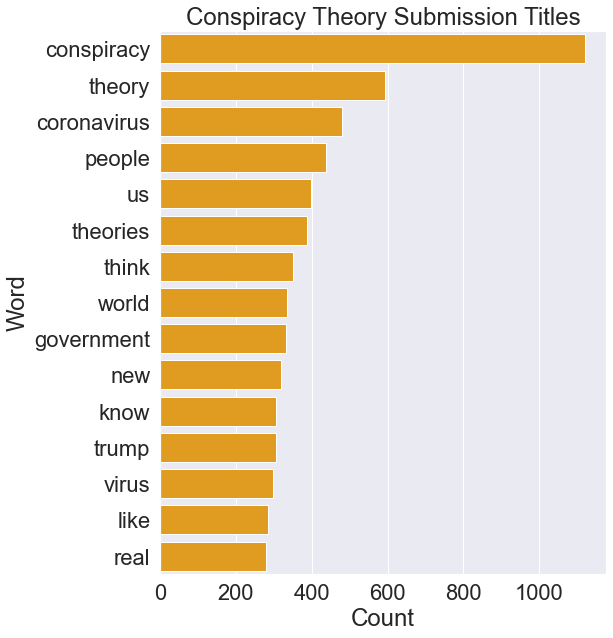

In [84]:
# Create Submission Bar Graph:

sns.set(font_scale=2)
plt.figure(figsize=(8, 10))
ax4 = sns.barplot(data=conspire_titles, 
                  x='count', 
                  y = 'ReviewText',
                  color = 'Orange')
ax4.set(xlabel='Count', ylabel='Word', title='Conspiracy Theory Submission Titles')
plt.show()

In [66]:
# Make dataframe for conspiracy theory comments:

conspire_comments = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

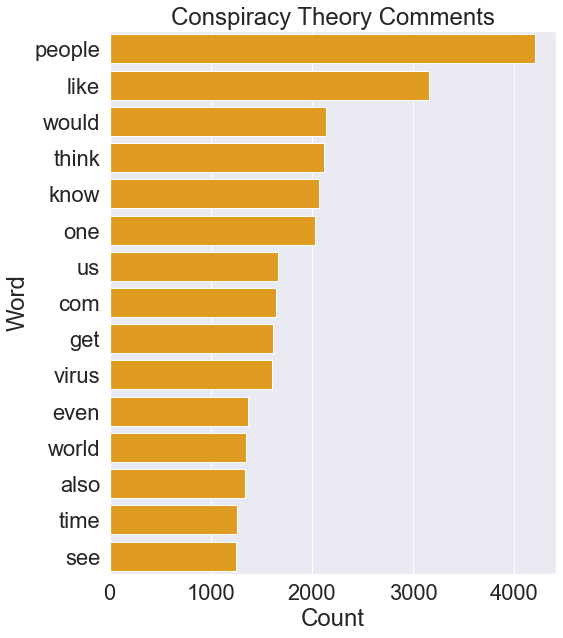

In [83]:
# Plot:

sns.set(font_scale=2)
plt.figure(figsize=(8,10))
ax3 = sns.barplot(data=conspire_comments, 
                  x='count', 
                  y = 'ReviewText',
                  color = 'Orange')
ax3.set(xlabel='Count', ylabel='Word', title='Conspiracy Theory Comments')
plt.show()

In [73]:
# Make dataframe for science titles:

science_titles = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

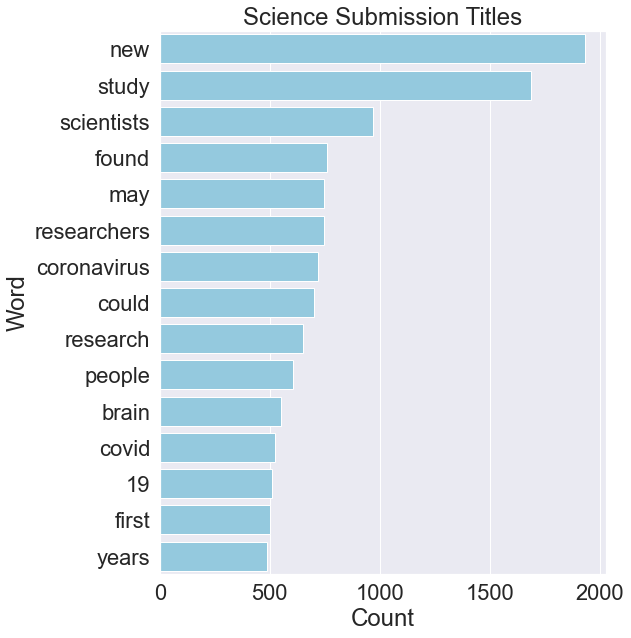

In [75]:
# Plot:

sns.set(font_scale=2)
plt.figure(figsize=(8, 10))
ax2 = sns.barplot(data=science_titles, 
                  x='count', 
                  y = 'ReviewText',
                  color = 'skyblue')
ax2.set(xlabel='Count', ylabel='Word', title='Science Submission Titles')
plt.show()

In [77]:
# Make dataframe for science comments:

science_comments = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

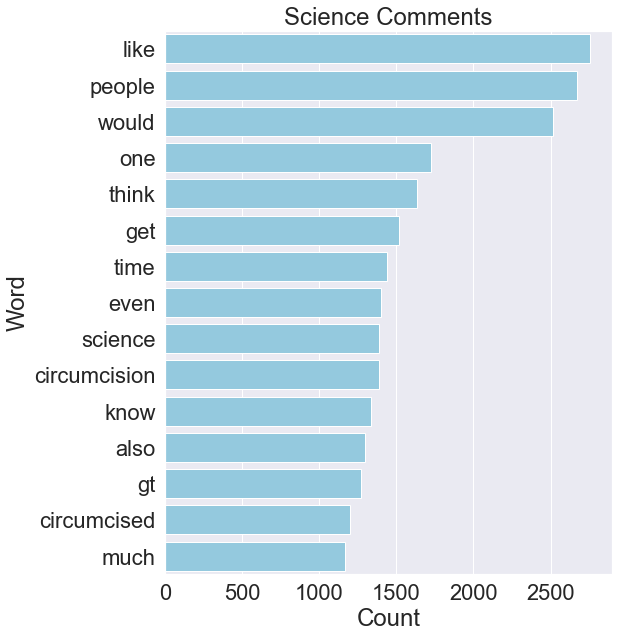

In [78]:
# Plot:

sns.set(font_scale=2)
plt.figure(figsize=(8, 10))
ax1 = sns.barplot(data=science_comments, 
                  x='count', 
                  y = 'ReviewText',
                  color = 'skyblue')
ax1.set(xlabel='Count', ylabel='Word', title='Science Comments')
plt.show()

In [1]:
# The top words for comments from both science and conspiracy theories don't seem too helpful.
# I suppose that makes sense, given the intrinsic difference in purpose between titles and comments.